1. Install google play scraper

In [ ]:
pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.3 MB/s eta 0:00:00


2. Import Library

In [ ]:
from google_play_scraper import app, Sort, reviews_all
import pandas as pd
import numpy as np

In [ ]:
#Make a scraper objects
result = reviews_all(
    'com.bibit.bibitid',
    sleep_milliseconds=0,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    filter_score_with=None
)

3. new_df hasil craping

In [ ]:
reviews = pd.DataFrame(np.array(result),columns=['review'])
reviews = reviews.join(pd.DataFrame(reviews.pop('review').tolist()))
reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ef5debc4-b103-4f2a-bf99-64b21fcbcb2a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Original,5,0,3.89.0,2024-11-23 13:23:15,None,NaT,3.89.0
1,a267d45f-bb47-4c20-b7d2-e2ae04e42907,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi untuk keuangan terbaik di Indonesia ,...",5,0,3.88.1,2024-11-23 11:46:10,None,NaT,3.88.1
2,c22e91db-b978-401e-a5a5-03fb93f97010,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍,5,0,3.89.0,2024-11-23 09:17:27,None,NaT,3.89.0
3,2628900f-d769-4251-a089-ecaa01e1164e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tidak bisa menambah akun bank,3,0,3.89.0,2024-11-23 00:20:01,"Hai kak, mohon maaf atas ketidaknyamanan yang ...",2024-11-25 02:30:17,3.89.0
4,850866cd-4ad5-46f5-85ca-f1affea477b1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,masih belom phm carapenarikannya,4,0,3.89.0,2024-11-22 16:50:09,"Hai kak, jika memiliki pertanyaan atau mengala...",2024-11-25 02:29:00,3.89.0


4. Menampilkan kolom variabel reviews

In [ ]:
reviews[['userName', 'score', 'at', 'content']].head()

,userName,score,at,content
0,Pengguna Google,5,2024-11-23 13:23:15,Original
1,Pengguna Google,5,2024-11-23 11:46:10,"Aplikasi untuk keuangan terbaik di Indonesia ,..."
2,Pengguna Google,5,2024-11-23 09:17:27,👍
3,Pengguna Google,3,2024-11-23 00:20:01,Tidak bisa menambah akun bank
4,Pengguna Google,4,2024-11-22 16:50:09,masih belom phm carapenarikannya


In [ ]:
new_reviews = reviews[['userName', 'score', 'at', 'content']]
sorted_reviews = new_reviews.sort_values(by='at', ascending=False)
sorted_reviews.head()

,userName,score,at,content
0,Pengguna Google,5,2024-11-23 13:23:15,Original
1,Pengguna Google,5,2024-11-23 11:46:10,"Aplikasi untuk keuangan terbaik di Indonesia ,..."
2,Pengguna Google,5,2024-11-23 09:17:27,👍
3,Pengguna Google,3,2024-11-23 00:20:01,Tidak bisa menambah akun bank
4,Pengguna Google,4,2024-11-22 16:50:09,masih belom phm carapenarikannya


In [ ]:
sorted_reviews.to_csv('Data Baru_Ulasan Aplikasi Bibit.csv', index=False)

5. Import data csv

In [ ]:
import pandas as pd
import numpy as np

ulasan = pd.read_csv('Data Baru_Ulasan Aplikasi Bibit.csv')
ulasan.head()

,userName,score,at,content
0,Pengguna Google,5,2024-11-23 13:23:15,Original
1,Pengguna Google,5,2024-11-23 11:46:10,"Aplikasi untuk keuangan terbaik di Indonesia ,..."
2,Pengguna Google,5,2024-11-23 09:17:27,👍
3,Pengguna Google,3,2024-11-23 00:20:01,Tidak bisa menambah akun bank
4,Pengguna Google,4,2024-11-22 16:50:09,masih belom phm carapenarikannya


In [ ]:
len(ulasan.index)

45322

6. Melakukan drop 3 kolom

In [ ]:
ulasan.drop(['userName', 'at', 'score'], inplace=True, axis=1)
ulasan.head()

,content
0,Original
1,"Aplikasi untuk keuangan terbaik di Indonesia ,..."
2,👍
3,Tidak bisa menambah akun bank
4,masih belom phm carapenarikannya


7. Install Sastrawi

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00


In [ ]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import json
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

8. Mengecek NULL, NaN atau duplikat

In [ ]:
ulasan = ulasan[(ulasan['content'] != '')]
ulasan = ulasan[(ulasan['content'].notna())]
ulasan = ulasan.drop_duplicates('content')

In [ ]:
len(ulasan.index)

35018

In [ ]:
ulasan.head()

,content
0,Original
1,"Aplikasi untuk keuangan terbaik di Indonesia ,..."
2,👍
3,Tidak bisa menambah akun bank
4,masih belom phm carapenarikannya


9. Melakukan preprocessing

In [ ]:
def cleaningUlasan(ulasan) :
  ulasan = re.sub(r'@[A-Za-a0-9]+',' ',ulasan)
  ulasan = re.sub(r'#[A-Za-a0-9]+',' ',ulasan)
  ulasan = re.sub(r"http\S+",' ',ulasan)
  ulasan = re.sub(r'[0-9]+',' ',ulasan)
  ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]"," ", ulasan)
  ulasan = ulasan.strip(' ')
  return ulasan

In [ ]:
def clearEmoji(ulasan):
  return ulasan.encode('ascii', 'ignore').decode('ascii')

In [ ]:
def replaceTOM(ulasan):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', ulasan)

In [ ]:
def caseFoldingText(ulasan):
    ulasan = ulasan.lower()
    return ulasan

In [ ]:
ulasan ['Cleaning'] = ulasan ['content'].apply(cleaningUlasan)
ulasan ['DeleteEmoji'] = ulasan ['Cleaning'].apply(clearEmoji)
ulasan ['3/Lebih'] = ulasan ['DeleteEmoji'].apply(replaceTOM)
ulasan ['CaseFolding'] = ulasan ['3/Lebih'].apply(caseFoldingText)

In [ ]:
ulasan.head()

,content,Cleaning,DeleteEmoji,3/Lebih,CaseFolding
0,Original,Original,Original,Original,original
1,"Aplikasi untuk keuangan terbaik di Indonesia ,...",Aplikasi untuk keuangan terbaik di Indonesia ...,Aplikasi untuk keuangan terbaik di Indonesia ...,Aplikasi untuk keuangan terbaik di Indonesia t...,aplikasi untuk keuangan terbaik di indonesia t...
2,👍,👍,,,
3,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,tidak bisa menambah akun bank
4,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya


10. Metode nltk untuk mengunduh tokenisasi lalu menerapkan

In [ ]:
import nltk
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [ ]:
ulasan['Tokenizing'] = ulasan['CaseFolding'].apply(word_tokenize_wrapper)
ulasan

,content,Cleaning,DeleteEmoji,3/Lebih,CaseFolding,Tokenizing
0,Original,Original,Original,Original,original,[original]
1,"Aplikasi untuk keuangan terbaik di Indonesia ,...",Aplikasi untuk keuangan terbaik di Indonesia ...,Aplikasi untuk keuangan terbaik di Indonesia ...,Aplikasi untuk keuangan terbaik di Indonesia t...,aplikasi untuk keuangan terbaik di indonesia t...,"[aplikasi, untuk, keuangan, terbaik, di, indon..."
2,👍,👍,,,,[]
3,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,tidak bisa menambah akun bank,"[tidak, bisa, menambah, akun, bank]"
4,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,"[masih, belom, phm, carapenarikannya]"
...,...,...,...,...,...,...
45316,Investasi di level resiko yang gue nyaman. Tan...,Investasi di level resiko yang gue nyaman Tan...,Investasi di level resiko yang gue nyaman Tan...,Investasi di level resiko yang gue nyaman Tan...,investasi di level resiko yang gue nyaman tan...,"[investasi, di, level, resiko, yang, gue, nyam..."
45317,"bgus nih aplikasi ,jdi lebih mudah pilih sama ...",bgus nih aplikasi jdi lebih mudah pilih sama ...,bgus nih aplikasi jdi lebih mudah pilih sama ...,bgus nih aplikasi jdi lebih mudah pilih sama ...,bgus nih aplikasi jdi lebih mudah pilih sama ...,"[bgus, nih, aplikasi, jdi, lebih, mudah, pilih..."
45318,Daripada taro duit di bank dimana bunga rendah...,Daripada taro duit di bank dimana bunga rendah...,Daripada taro duit di bank dimana bunga rendah...,Daripada taro duit di bank dimana bunga rendah...,daripada taro duit di bank dimana bunga rendah...,"[daripada, taro, duit, di, bank, dimana, bunga..."
45319,"Design nya sangat bagus, dan membuat investasi...",Design nya sangat bagus dan membuat investasi...,Design nya sangat bagus dan membuat investasi...,Design nya sangat bagus dan membuat investasi...,design nya sangat bagus dan membuat investasi...,"[design, nya, sangat, bagus, dan, membuat, inv..."


11. Melakukan normalisasi dgn fungsi Convert to Slang word

In [ ]:
import re

def convertToSlangWord(ulasan):
    with open('/content/combined_slang_words(1).txt', 'r') as file:
        kamusSlang = eval(file.read())

    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in kamusSlang.keys()) + r')\b')
    content = []
    for text in ulasan:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()], text)
        content.append(filterSlang.lower())
    ulasan = content
    return ulasan

In [ ]:
ulasan['Normalisasi'] = ulasan['Tokenizing'].apply(convertToSlangWord)
ulasan

,content,Cleaning,DeleteEmoji,3/Lebih,CaseFolding,Tokenizing,Normalisasi
0,Original,Original,Original,Original,original,[original],[original]
1,"Aplikasi untuk keuangan terbaik di Indonesia ,...",Aplikasi untuk keuangan terbaik di Indonesia ...,Aplikasi untuk keuangan terbaik di Indonesia ...,Aplikasi untuk keuangan terbaik di Indonesia t...,aplikasi untuk keuangan terbaik di indonesia t...,"[aplikasi, untuk, keuangan, terbaik, di, indon...","[aplikasi, untuk, keuangan, terbaik, di, indon..."
2,👍,👍,,,,[],[]
3,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,tidak bisa menambah akun bank,"[tidak, bisa, menambah, akun, bank]","[tidak, bisa, menambah, akun, bank]"
4,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,"[masih, belom, phm, carapenarikannya]","[masih, belum, phm, carapenarikannya]"
...,...,...,...,...,...,...,...
45316,Investasi di level resiko yang gue nyaman. Tan...,Investasi di level resiko yang gue nyaman Tan...,Investasi di level resiko yang gue nyaman Tan...,Investasi di level resiko yang gue nyaman Tan...,investasi di level resiko yang gue nyaman tan...,"[investasi, di, level, resiko, yang, gue, nyam...","[investasi, di, level, resiko, yang, saya, nya..."
45317,"bgus nih aplikasi ,jdi lebih mudah pilih sama ...",bgus nih aplikasi jdi lebih mudah pilih sama ...,bgus nih aplikasi jdi lebih mudah pilih sama ...,bgus nih aplikasi jdi lebih mudah pilih sama ...,bgus nih aplikasi jdi lebih mudah pilih sama ...,"[bgus, nih, aplikasi, jdi, lebih, mudah, pilih...","[bgus, ini, aplikasi, jadi, lebih, mudah, pili..."
45318,Daripada taro duit di bank dimana bunga rendah...,Daripada taro duit di bank dimana bunga rendah...,Daripada taro duit di bank dimana bunga rendah...,Daripada taro duit di bank dimana bunga rendah...,daripada taro duit di bank dimana bunga rendah...,"[daripada, taro, duit, di, bank, dimana, bunga...","[daripada, taro, duit, di, bank, dimana, bunga..."
45319,"Design nya sangat bagus, dan membuat investasi...",Design nya sangat bagus dan membuat investasi...,Design nya sangat bagus dan membuat investasi...,Design nya sangat bagus dan membuat investasi...,design nya sangat bagus dan membuat investasi...,"[design, nya, sangat, bagus, dan, membuat, inv...","[design, nya, sangat, bagus, dan, membuat, inv..."


12. Melakukan proses stopword

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(open("/content/combined_slang_words(1).txt", "r").read().split("/n"))

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

In [ ]:
ulasan['Stopwords'] = ulasan['Normalisasi'].apply(stopwords_removal)
ulasan

,content,Cleaning,DeleteEmoji,3/Lebih,CaseFolding,Tokenizing,Normalisasi,Stopwords
0,Original,Original,Original,Original,original,[original],[original],[original]
1,"Aplikasi untuk keuangan terbaik di Indonesia ,...",Aplikasi untuk keuangan terbaik di Indonesia ...,Aplikasi untuk keuangan terbaik di Indonesia ...,Aplikasi untuk keuangan terbaik di Indonesia t...,aplikasi untuk keuangan terbaik di indonesia t...,"[aplikasi, untuk, keuangan, terbaik, di, indon...","[aplikasi, untuk, keuangan, terbaik, di, indon...","[aplikasi, keuangan, terbaik, indonesia, terim..."
2,👍,👍,,,,[],[],[]
3,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,Tidak bisa menambah akun bank,tidak bisa menambah akun bank,"[tidak, bisa, menambah, akun, bank]","[tidak, bisa, menambah, akun, bank]","[menambah, akun, bank]"
4,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,masih belom phm carapenarikannya,"[masih, belom, phm, carapenarikannya]","[masih, belum, phm, carapenarikannya]","[phm, carapenarikannya]"
...,...,...,...,...,...,...,...,...
45316,Investasi di level resiko yang gue nyaman. Tan...,Investasi di level resiko yang gue nyaman Tan...,Investasi di level resiko yang gue nyaman Tan...,Investasi di level resiko yang gue nyaman Tan...,investasi di level resiko yang gue nyaman tan...,"[investasi, di, level, resiko, yang, gue, nyam...","[investasi, di, level, resiko, yang, saya, nya...","[investasi, level, resiko, nyaman, janji, mulu..."
45317,"bgus nih aplikasi ,jdi lebih mudah pilih sama ...",bgus nih aplikasi jdi lebih mudah pilih sama ...,bgus nih aplikasi jdi lebih mudah pilih sama ...,bgus nih aplikasi jdi lebih mudah pilih sama ...,bgus nih aplikasi jdi lebih mudah pilih sama ...,"[bgus, nih, aplikasi, jdi, lebih, mudah, pilih...","[bgus, ini, aplikasi, jadi, lebih, mudah, pili...","[bgus, aplikasi, mudah, pilih, beli, rekasadana]"
45318,Daripada taro duit di bank dimana bunga rendah...,Daripada taro duit di bank dimana bunga rendah...,Daripada taro duit di bank dimana bunga rendah...,Daripada taro duit di bank dimana bunga rendah...,daripada taro duit di bank dimana bunga rendah...,"[daripada, taro, duit, di, bank, dimana, bunga...","[daripada, taro, duit, di, bank, dimana, bunga...","[taro, duit, bank, dimana, bunga, rendah, biay..."
45319,"Design nya sangat bagus, dan membuat investasi...",Design nya sangat bagus dan membuat investasi...,Design nya sangat bagus dan membuat investasi...,Design nya sangat bagus dan membuat investasi...,design nya sangat bagus dan membuat investasi...,"[design, nya, sangat, bagus, dan, membuat, inv...","[design, nya, sangat, bagus, dan, membuat, inv...","[design, nya, bagus, investasi, reksa, dana, c..."


In [ ]:
# Menyimpan DataFrame 'ulasan' menjadi file CSV di Google Drive
ulasan.to_csv('/content/Data ulasan.csv', index=False, encoding='utf-8')

print("File CSV berhasil disimpan dengan nama 'Data ulasan.csv'")

File CSV berhasil disimpan dengan nama 'Data ulasan.csv'


13. Proses Stemming

In [ ]:
import pandas as pd
file_path = "Data ulasan.csv"  # Ganti dengan path file Anda
data = pd.read_csv(file_path)

In [ ]:
stop_words_data = data['Stopwords']

In [ ]:
stop_words_data.to_csv("Stopwords ulasan.csv", index=False)

In [ ]:
stopwords_data = pd.read_csv('Stopwords ulasan.csv')
_1000_stopwords_data = stopwords_data[0:1000]

In [ ]:
from tqdm.notebook import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

In [ ]:
tqdm.pandas()
_1000_stopwords_data = _1000_stopwords_data.progress_apply(lambda x: [stemmer.stem(y) for y in x])
_1000_stopwords_data.fillna("_1000_stopwords_data").astype(str)
_1000_stopwords_data = _1000_stopwords_data.drop_duplicates()

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
_1000_stopwords_data.dropna()

,Stopwords
0,original
1,aplikasi uang baik indonesia terima kasih bibit
2,
3,tambah akun bank
4,phm carapenarikannya
...,...
993,coba apk investasi legal bibit unggul produk r...
994,suka akun
996,aman kali ganti password masuk password terus ...
997,apa konfirmasi akun video call ribet biar coba...


In [ ]:
_1000_stopwords_data = _1000_stopwords_data[(_1000_stopwords_data['Stopwords'] != '')]
_1000_stopwords_data = _1000_stopwords_data[(_1000_stopwords_data['Stopwords'].notna())]
_1000_stopwords_data = _1000_stopwords_data.drop_duplicates('Stopwords')

In [ ]:
_1000_stopwords_data.to_csv('PreProcessing_data.csv', index=False)

14. Install google trans

In [ ]:
!pip install --upgrade googletrans==3.1.0.a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=6512e7b595b6eefb63dc0d60f691efc6b681952d1ad5c9f07701cf50223a2769
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

15. Membuat variabel baru dgn namaa translator dan translations

In [ ]:
import pandas as pd
import googletrans
from googletrans import Translator

In [ ]:
translate_ulasan = pd.read_csv('PreProcessing_data.csv')
translate_ulasan.head()

,Stopwords
0,original
1,aplikasi uang baik indonesia terima kasih bibit
2,tambah akun bank
3,phm carapenarikannya
4,aplikasi buka


In [ ]:
translator = Translator()
translations = {}
for column in translate_ulasan.columns:
    unique_values = translate_ulasan[column].unique()
    for element in unique_values:  # Changed unique_element to unique_values
        translations[element] = translator.translate(element).text

In [ ]:
translate_ulasan.replace(translations, inplace=True)
translate_ulasan.head()

,Stopwords
0,original
1,"Indonesian good money application, thank you seed"
2,add bank account
3,phm how to withdraw
4,open application


In [ ]:
translate_ulasan.to_csv('Translate_data.csv', index=False)

16 Install pelabelan data menggunakan Vader

In [ ]:
!pip install VaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
SentimentIntensityAnalyzer

vaderSentiment.vaderSentiment.SentimentIntensityAnalyzer

In [ ]:
translateUlasan = pd.read_csv('Translate_data.csv')
analyzer = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyzer.polarity_scores(x) for x in translateUlasan['Stopwords']]
scores

[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3182},
 {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.6597},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732},
 {'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'compound': -0.3261},
 {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'compound': 0.2263},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404},
 {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'compound': -0.5106},
 {'neg': 0.0, 'neu': 0.375, 'pos': 0.625, 'compound': 0.6124},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.103, 'neu': 0.775, 'pos': 0.123, 'compound': 0.1571},
 {'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.6908},
 {'neg': 0.219, 'neu': 0.464, 'pos': 0.317, 'compound': 0.2987},
 {'neg': 0.0, 'neu': 0.461

In [ ]:
translateUlasan['Compound_Score'] = [x['compound'] for x in scores]
translateUlasan.head()

,Stopwords,Compound_Score
0,original,0.3182
1,"Indonesian good money application, thank you seed",0.6597
2,add bank account,0.0000
3,phm how to withdraw,0.0000
4,open application,0.0000


17. Pelabelan Compound Score

In [ ]:
translateUlasan.loc[translateUlasan['Compound_Score'] < 0, 'Sentiments'] = 'Negative'
translateUlasan.loc[translateUlasan['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
translateUlasan.loc[translateUlasan['Compound_Score'] > 0, 'Sentiments'] = 'Positive'

In [ ]:
translateUlasan.head()

,Stopwords,Compound_Score,Sentiments
0,original,0.3182,Positive
1,"Indonesian good money application, thank you seed",0.6597,Positive
2,add bank account,0.0000,Netral
3,phm how to withdraw,0.0000,Netral
4,open application,0.0000,Netral


18. Diagram Chart-pie

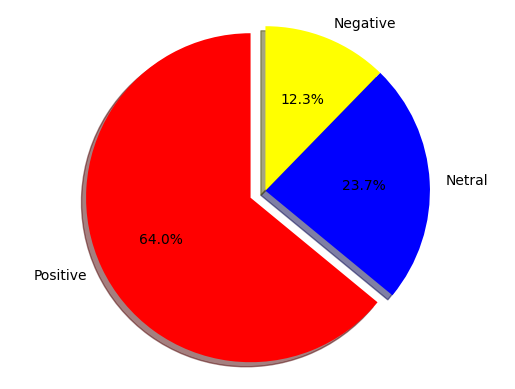

In [ ]:
import matplotlib.pyplot as plt

labels = 'Positive', 'Netral', 'Negative'
sizes = [len(translateUlasan[translateUlasan['Sentiments'] == 'Positive']),
         len(translateUlasan[translateUlasan['Sentiments'] == 'Netral']),
         len(translateUlasan[translateUlasan['Sentiments'] == 'Negative'])]

explode = (0.1, 0, 0)
colors = ['red', 'blue', 'yellow']
fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

19. Import Modul Wordcloud

In [ ]:
translateUlasan.to_csv('/content/Hasil Sentiment.csv', index=False, encoding='utf-8')

print("File CSV berhasil disimpan dengan nama 'Hasil Sentiment.csv'")

File CSV berhasil disimpan dengan nama 'Hasil Sentiment.csv'


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Hasil Sentiment.csv')
df.head()

,Stopwords,Compound_Score,Sentiments
0,original,0.3182,Positive
1,"Indonesian good money application, thank you seed",0.6597,Positive
2,add bank account,0.0000,Netral
3,phm how to withdraw,0.0000,Netral
4,open application,0.0000,Netral


In [ ]:
positive_text = ' '.join(df[df['Sentiments'] == 'Positive']['Stopwords'])
negative_text = ' '.join(df[df['Sentiments'] == 'Negative']['Stopwords'])

20. Wordcloud Positif

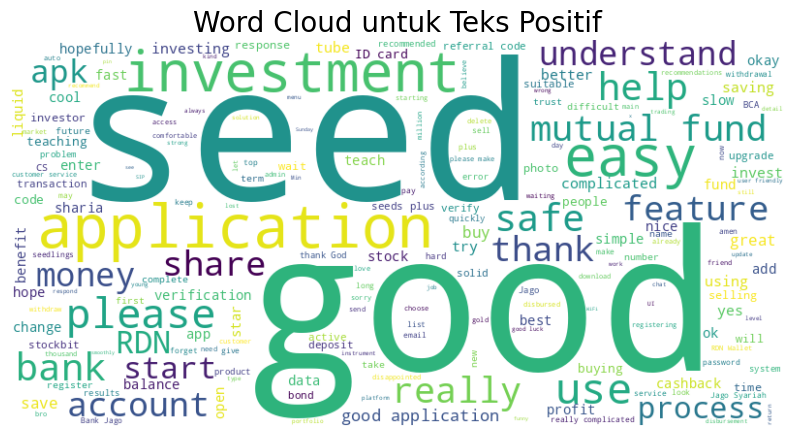

In [ ]:
positive_wordcloud =  WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud untuk Teks Positif', fontsize=20)
plt.axis('off')
plt.show()

21. Wordcloud negatif


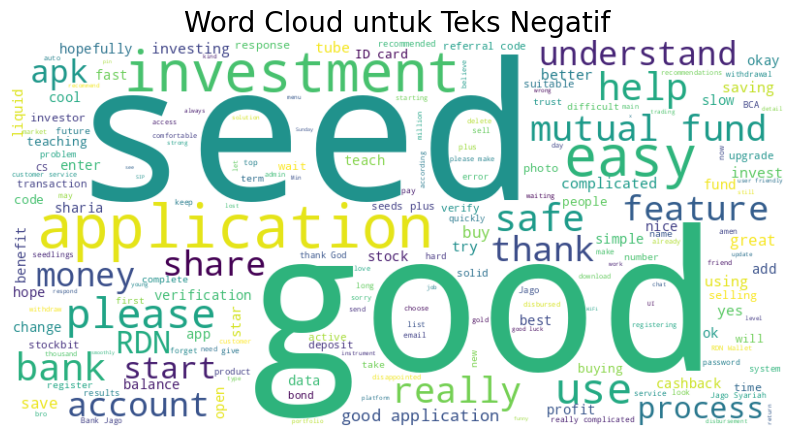

In [ ]:
negative_wordcloud =  WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 7))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud untuk Teks Negatif', fontsize=20)
plt.axis('off')
plt.show()

22. ekstraksi fitur chi-square dan label encoder

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('Hasil Sentiment.csv')

In [ ]:
x_texts = data['Stopwords']
y_sentiments = data['Sentiments']

In [ ]:
labelEncoder = LabelEncoder()
y_encoded = labelEncoder.fit_transform(y_sentiments)
y_encoded

array([2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2,
       0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1,
       1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2, 1,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2,

23.Count Vectorize

In [ ]:
vectorizer = CountVectorizer()
X_texts = data['Stopwords']
y_sentiments = data['Sentiments']
X_features = vectorizer.fit_transform(X_texts)

In [ ]:
features_names = vectorizer.get_feature_names_out()

In [ ]:
df = pd.DataFrame(X_features.toarray(), columns=features_names)
df

,1000,about,abundant,accept,access,accommodates,accor,accord,according,account,...,year,yes,yesterday,yet,you,young,your,zee,zero,zhlcpqq
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
908,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
909,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
910,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


24. memisahkan setiap sentiment

In [ ]:
positive_texts = X_texts[y_sentiments == 'Positive'].tolist()
negative_texts = X_texts[y_sentiments == 'Negative'].tolist()
neutral_texts = X_texts[y_sentiments == 'Netral'].tolist()

In [ ]:
vectorizer = CountVectorizer()
X_positive = vectorizer.fit_transform(positive_texts).sum(axis=0).A1
X_negative = vectorizer.transform(negative_texts).sum(axis=0).A1 # Changed 'vectorizertransform' to 'vectorizer.transform'
X_neutral = vectorizer.transform(neutral_texts).sum(axis=0).A1
features_names = vectorizer.get_feature_names_out()

In [ ]:
df = pd.DataFrame(list(zip(features_names, X_positive, X_negative, X_neutral)),
                  columns=['Word', 'Total_Positive', 'Total_Negative', 'Total_Netral'])
df.sort_values(by='Total_Positive', ascending=False)


,Word,Total_Positive,Total_Negative,Total_Netral
965,the,354,111,62
984,to,223,53,12
402,good,188,9,1
502,it,165,51,6
63,application,148,24,16
...,...,...,...,...
470,increase,1,0,0
471,increasing,1,0,0
473,indigo,1,0,0
474,indomie,1,0,0


25. menghitung jumlah dr total Pos, Net, Neg

In [ ]:
df['Grand Total'] = df['Total_Positive'] + df['Total_Negative'] + df['Total_Netral']
df = df.sort_values(by='Grand Total', ascending=False)
print(df)

             Word  Total_Positive  Total_Negative  Total_Netral  Grand Total
965           the             354             111            62          527
984            to             223              53            12          288
502            it             165              51             6          222
402          good             188               9             1          198
63    application             148              24            16          188
...           ...             ...             ...           ...          ...
503          ives               1               0             0            1
506          jeef               1               0             0            1
507            jm               1               0             0            1
509         jogja               1               0             0            1
1118      zhlcpqq               1               0             0            1

[1119 rows x 5 columns]


In [ ]:
alpha = 0.05
ch2 = SelectKBest(chi2, k='all')
X_new = ch2.fit_transform(X_features, y_encoded)

In [ ]:
selected_features_indices = np.where(ch2.pvalues_ <=alpha)[0]

26. buat new df sesuai data valid indices

In [ ]:
feature_names = X_features.columns if hasattr(X_features, 'columns') else [f"feature_{i}" for i in range(X_features.shape[1])]

valid_indices = [idx for idx in selected_features_indices if idx < len(feature_names)]

In [ ]:
selected_features_df = pd.DataFrame(data={
    'Feature' : [feature_names[i] for i in valid_indices],
    'Chi-Square' : ch2.scores_[valid_indices],
    'P-Value' : ch2.pvalues_[valid_indices]
})
selected_features_df.sort_values(by='Chi-Square', ascending=False)

,Feature,Chi-Square,P-Value
250,feature_1358,98.367025,4.363870e-22
105,feature_521,84.113805,5.431494e-19
129,feature_645,65.600562,5.688776e-15
228,feature_1232,65.518641,5.926630e-15
233,feature_1254,63.181500,1.906828e-14
...,...,...,...
158,feature_832,6.282975,4.321847e-02
230,feature_1238,6.197652,4.510213e-02
110,feature_561,6.178082,4.554561e-02
203,feature_1107,6.019569,4.930229e-02


27. Ml naive bayes dan K-Nearest

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_encoded, test_size=0.2, random_state=42)

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb_classifier.predict(X_test)

In [ ]:
nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Naive Bayes", nb_accuracy)

Accuracy Naive Bayes 0.7103825136612022


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.13      0.22        31
           1       0.65      0.41      0.50        32
           2       0.72      0.94      0.82       120

    accuracy                           0.71       183
   macro avg       0.68      0.49      0.51       183
weighted avg       0.70      0.71      0.66       183



28. K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
kn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy K-Nearest Neighbors", kn_accuracy)

Accuracy K-Nearest Neighbors 0.639344262295082
